# GeoPandas

## Reading files

Load the required modules

In [1]:
import geopandas as gpd
%matplotlib inline

Load a GeoJSON file containing GeoJSON file.

In [2]:
countries = gpd.read_file('Data/countries.geo.json')

Get info on the dataframe.

In [3]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
id          180 non-null object
name        180 non-null object
geometry    180 non-null object
dtypes: object(3)
memory usage: 4.3+ KB


Set the country (ISO) ID as the index for the dataframe.

In [5]:
countries.set_index('id', inplace=True)

Get the geomerty for Belgium. It is returned as a Shapely object, a `Polygon` in this case.

In [6]:
belgium_shape = countries.at['BEL', 'geometry']

In [7]:
type(belgium_shape)

shapely.geometry.polygon.Polygon

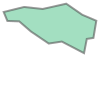

In [8]:
belgium_shape

## Spatial selection

Spatial selections can be made using the `cx` method.  The latter takes a range of $x$ and $y$ coordinates (or longitude and lattitude, depending on the coordinate reference system), and returns all shapes that intersect that region.

In [9]:
benelux = countries.cx[5.0:6.0, 50.0:51.0]

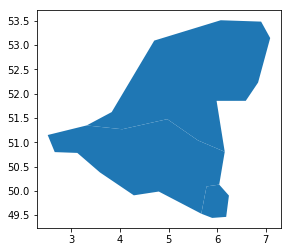

In [10]:
benelux.plot();

In [11]:
benelux

,name,geometry
id,,
BEL,Belgium,"POLYGON ((3.314971 51.345781, 4.047071 51.2672..."
LUX,Luxembourg,"POLYGON ((6.043073 50.128052, 6.242751 49.9022..."
NLD,Netherlands,"POLYGON ((6.074183 53.510403, 6.90514 53.48216..."


This dataframe can be converted into a Shapely object.

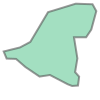

In [12]:
benelux_shape = benelux.unary_union
benelux_shape

In [13]:
type(benelux_shape)

shapely.geometry.polygon.Polygon

The coordinate reference system of the original data is an attribute of the dataframe.

## Coordinate system

In [14]:
countries.crs

{'init': 'epsg:4326'}

Many of the operations that work on Shapely objects have their counterpart on GeoPandas `GeoSeries` and `GeoDataFrame`. The result of computing the boundary on our dataframe is a `GeoSeries` of `LineString` shapes.

## Constructive operations

In [15]:
boundaries = countries.boundary

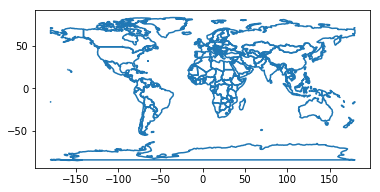

In [16]:
boundaries.plot();

In [49]:
boundaries.describe()

count                                                   180
unique                                                  180
top       LINESTRING (-61.2 -51.85, -60 -51.25, -59.15 -...
freq                                                      1
dtype: object

## Set-theoretic operations

Overlay operations allow set-theoretic operations on two `GeoDataFrame` objects. Consider "Western Europe" and "Southern Europe", we can compute the union and the intersection of those dataframes.

In [17]:
western_europe = countries.cx[0:10, 50:55]

In [18]:
print(western_europe['name'])

id
BEL           Belgium
DEU           Germany
DNK           Denmark
FRA            France
GBR    United Kingdom
LUX        Luxembourg
NLD       Netherlands
Name: name, dtype: object


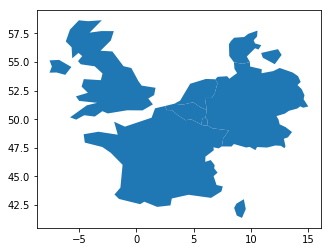

In [19]:
western_europe.plot();

In [20]:
southern_europe = countries.cx[-10:20, 40:45]

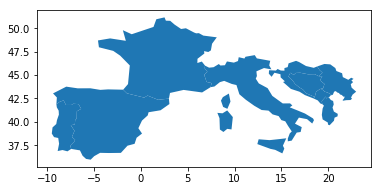

In [21]:
southern_europe.plot();

In [22]:
union = gpd.overlay(western_europe, southern_europe, how='union', use_sindex=False)

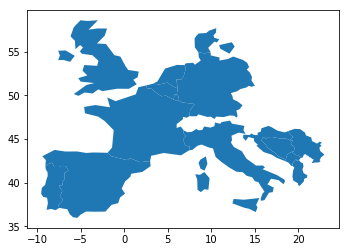

In [23]:
union.plot();

In [24]:
union

,name,name_2,geometry
0,None,Portugal,"POLYGON ((-9.034818 41.880571, -8.671946 42.13..."
1,None,Spain,"POLYGON ((-8.671946 42.134689, -9.034818 41.88..."
2,None,Albania,"POLYGON ((20.590247 41.855404, 20.463175 41.51..."
3,None,Albania,"POLYGON ((19.3717684562836 41.87755057136166, ..."
4,None,Montenegro,"POLYGON ((19.738051 42.688247, 19.304486 42.19..."
5,None,Republic of Serbia,"POLYGON ((19.390476 45.236516, 19.072769 45.52..."
6,None,Croatia,"POLYGON ((19.072769 45.521511, 19.390476 45.23..."
7,None,Croatia,"POLYGON ((19.072769 45.521511, 18.829824610773..."
8,None,Croatia,"POLYGON ((18.45001682335878 42.47999227271605,..."
9,None,Bosnia and Herzegovina,"POLYGON ((18.70648 43.20011, 18.56 42.65, 17.6..."


In [25]:
intersection = gpd.overlay(western_europe, southern_europe, how='intersection', use_sindex=False)

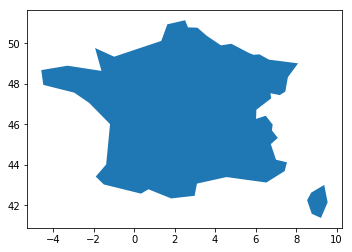

In [26]:
intersection.plot();

In [27]:
intersection.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
name        2 non-null object
name_2      2 non-null object
geometry    2 non-null object
dtypes: object(3)
memory usage: 128.0+ bytes


In [28]:
intersection

,name,name_2,geometry
0,France,France,"POLYGON ((9.560015999999999 42.152492, 9.22975..."
1,France,France,"POLYGON ((6.65823 49.201958, 8.099278999999999..."


Note that France was a `Multipolygon` of two regions, France on the continent, and Sardinia, overlay operations decompose multi-objects into their parts, i.e., `Polygon` in this case.

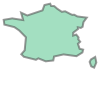

In [30]:
france = intersection.unary_union
france

In [31]:
type(france)

shapely.geometry.multipolygon.MultiPolygon

## Merging data

Import the required modules.

In [32]:
import pandas as pd

Read the World Happiness data set as an ordinary Pandas `DataFrame`.

In [53]:
happiness = pd.read_csv('Data/world_happiness_2016.csv')
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


The country name is in the `name` column of the `countries` `GeoDataFrame`, but in the `Country` column of the `happiness` `DataFrame`. We simply rename the latter to `name`.

In [55]:
happiness.rename(columns={'Country': 'name'}, inplace=True)

Now we can merge the dataframes on `name`.

In [56]:
geo_happiness = countries.merge(happiness, on='name')
geo_happiness.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 14 columns):
name                             144 non-null object
geometry                         144 non-null object
Region                           144 non-null object
Happiness Rank                   144 non-null int64
Happiness Score                  144 non-null float64
Lower Confidence Interval        144 non-null float64
Upper Confidence Interval        144 non-null float64
Economy (GDP per Capita)         144 non-null float64
Family                           144 non-null float64
Health (Life Expectancy)         144 non-null float64
Freedom                          144 non-null float64
Trust (Government Corruption)    144 non-null float64
Generosity                       144 non-null float64
Dystopia Residual                144 non-null float64
dtypes: float64(10), int64(1), object(3)
memory usage: 16.9+ KB


Creating a chloropleth is now pretty trivial.

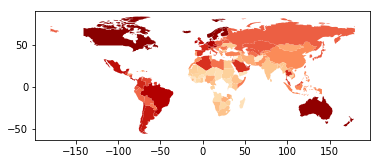

In [57]:
geo_happiness.plot(column='Happiness Score', cmap='OrRd');

Note that there is quite some missing data due to a data linkage issue.  The country names in both dataframes are not always exactly the same.

Since the new `GeoDataFrame` now has a region attribute, we can use that to aggregate on that basis.

In [58]:
world = geo_happiness[['name', 'Region', 'geometry']]
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 3 columns):
name        144 non-null object
Region      144 non-null object
geometry    144 non-null object
dtypes: object(3)
memory usage: 4.5+ KB


In [59]:
regions = world.dissolve(by='Region')
regions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 10 entries, Australia and New Zealand to Western Europe
Data columns (total 2 columns):
geometry    10 non-null object
name        10 non-null object
dtypes: object(2)
memory usage: 560.0+ bytes


In [60]:
regions

,geometry,name
Region,,
Australia and New Zealand,"(POLYGON ((143.561811 -13.763656, 143.922099 -...",Australia
Central and Eastern Europe,"(POLYGON ((-175.01425 66.58435, -174.33983 66....",Albania
Eastern Asia,"(POLYGON ((110.339188 18.678395, 109.47521 18....",China
Latin America and Caribbean,"(POLYGON ((-66.95992 -54.89681, -67.2910300000...",Argentina
Middle East and Northern Africa,"(POLYGON ((27.192377 40.690566, 26.358009 40.1...",United Arab Emirates
North America,"(POLYGON ((-132.710008 54.040009, -131.74999 5...",Canada
Southeastern Asia,"(POLYGON ((120.715609 -10.239581, 120.295014 -...",Indonesia
Southern Asia,"(POLYGON ((81.787959 7.523055, 81.637322 6.481...",Afghanistan
Sub-Saharan Africa,"(POLYGON ((49.543519 -12.469833, 49.808981 -12...",Angola


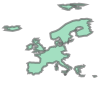

In [61]:
regions.at['Western Europe', 'geometry']